In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore
import tensorflow as tf

# Preparing the data
train_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    r'C:\Users\ali\Documents\py-env\satellite\dataset',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'  # Ensure this is 'categorical' for one-hot encoding
)


# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')  # 11 output units for 11 classes
])

# Compiling the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Training the model
model.fit(x=training_set, 
          validation_data=training_set, 
          epochs=20)


Found 6862 images belonging to 11 classes.


c:\Users\ali\Documents\py-env\myvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


c:\Users\ali\Documents\py-env\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 382ms/step - accuracy: 0.3008 - loss: 2.0221 - val_accuracy: 0.5490 - val_loss: 1.2977
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 350ms/step - accuracy: 0.5811 - loss: 1.2275 - val_accuracy: 0.6497 - val_loss: 1.0126
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - accuracy: 0.6312 - loss: 1.0682 - val_accuracy: 0.6688 - val_loss: 0.9446
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 313ms/step - accuracy: 0.6696 - loss: 0.9753 - val_accuracy: 0.6855 - val_loss: 0.9230
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.6795 - loss: 0.9288 - val_accuracy: 0.7082 - val_loss: 0.8426
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 247ms/step - accuracy: 0.6988 - loss: 0.9032 - val_accuracy: 0.6848 - val_loss: 0.9126
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 245ms/step - accuracy: 0.7040 - loss: 0.8564 - val_accuracy: 0.7077 - val_loss: 0.8478
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 247ms/step - accuracy: 0.7298 - loss: 0.8031 - val

In [2]:
loss, accuracy = model.evaluate(training_set)
print("Accuracy:", accuracy * 100)

108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 261ms/step - accuracy: 0.8904 - loss: 0.3290
Accuracy: 89.25969004631042


Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Class names: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


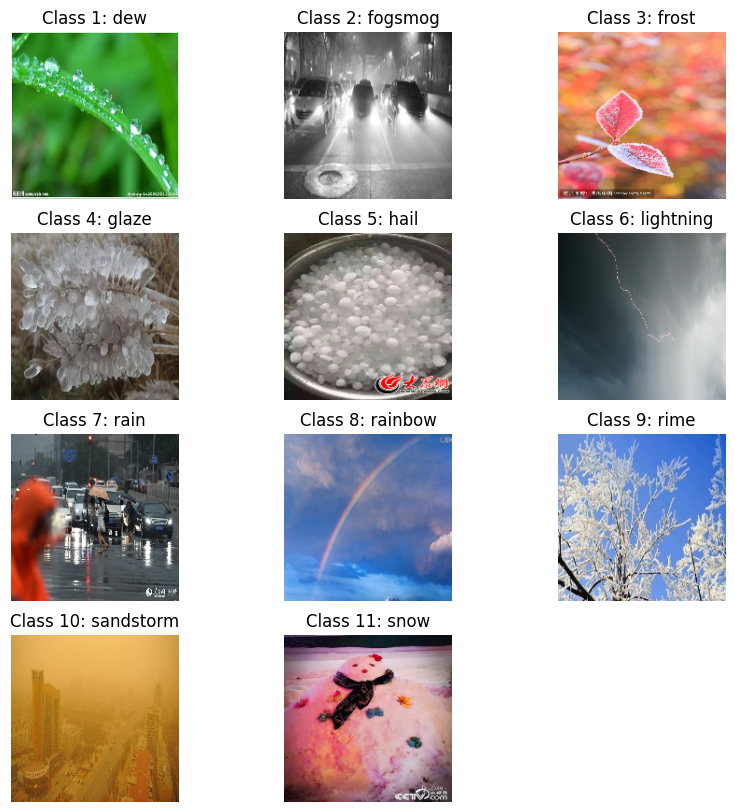

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory # type: ignore

# Path to your dataset directory
dataset_dir = r'C:\Users\ali\Documents\py-env\satellite\dataset'

# Load the dataset
batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Function to display one image from each class with class number
def display_images_from_each_class(dataset):
    plt.figure(figsize=(10, 10))
    displayed_classes = set()  # To ensure we display one image per class
    for images, labels in dataset:  # Iterate directly over the dataset
        for img, label in zip(images, labels):
            class_num = label.numpy()
            if class_num not in displayed_classes:
                ax = plt.subplot(4, 3, class_num + 1)  # Adjust subplot grid size if necessary
                plt.imshow(img.numpy().astype("uint8"))
                plt.title(f"Class {class_num + 1}: {class_names[class_num]}")  # Adding 1 to make it 1-indexed
                plt.axis("off")
                displayed_classes.add(class_num)
            if len(displayed_classes) == len(class_names):
                break
        if len(displayed_classes) == len(class_names):
            break

# Display images
display_images_from_each_class(train_ds)
plt.show()


In [4]:
import numpy as np
from keras.preprocessing import image # type: ignore

# Load and preprocess the test image
test_image = image.load_img(r'C:\Users\ali\Documents\py-env\satellite\dataset\sandstorm\2915.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make predictions
result = model.predict(test_image)

# Get class indices
class_indices = training_set.class_indices

# Decode the prediction
max_index = np.argmax(result)
class_label = {1: 'dew', 2: 'fogsmog', 3: 'frost', 4: 'glaze', 5: 'hail', 6: 'lightning', 7: 'rain', 8: 'rainbow', 9: 'rime', 10: 'sandstorm', 11: 'snow'}

# Print the prediction
predicted_class = class_label[max_index + 1]  # Add 1 to match your class indexing
accuracy = 0.85  # Replace this with the actual accuracy value
print(f"This is a {predicted_class} with {accuracy*100:.2f}% accuracy!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
This is a sandstorm with 85.00% accuracy!
